<a href="https://colab.research.google.com/github/priyasjsu/Machine-learning-models/blob/main/XG_Boost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Diamond price prediction using multiple regression model and comapre their performance.
models included - Linear Regression, Lasso, Decision tree, Random forest, KNN, XGboost and Cross Validate with Simple Cross Validation and Grid Search Validation. 



In [2]:
pip install --upgrade xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd

import numpy as np

In [17]:
df = pd.read_csv('diamonds.csv')


In [18]:
df.head()


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
df.shape

(53940, 11)

In [19]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [20]:
df.describe(exclude=np.number)

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


There are 53940 non-null values in all the attributes thus no missing values

Datatype of features 'cut', 'color' & 'clarity' is "object" which needs to be converted into numerical variable (will be done in data preprocessing) before we feed the data to algorithms.

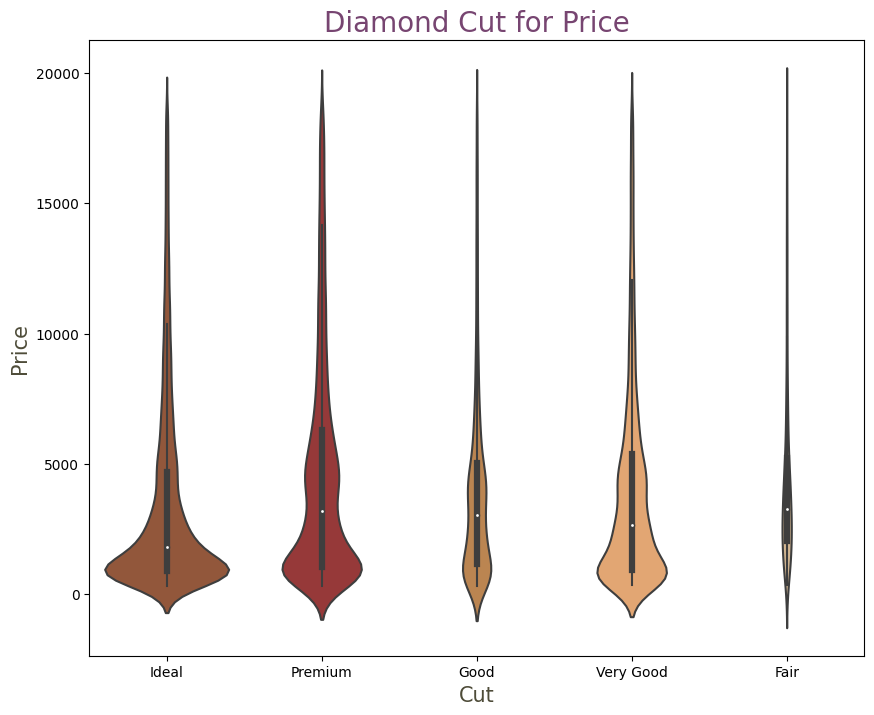

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
cols = ["#A0522D","#A52A2A","#CD853F","#F4A460","#DEB887"]
ax = sns.violinplot(x="cut",y="price", data=df, palette=cols,scale= "count")
ax.set_title("Diamond Cut for Price", color="#774571", fontsize = 20)
ax.set_ylabel("Price", color="#4e4c39", fontsize = 15)
ax.set_xlabel("Cut", color="#4e4c39", fontsize = 15)
plt.show()

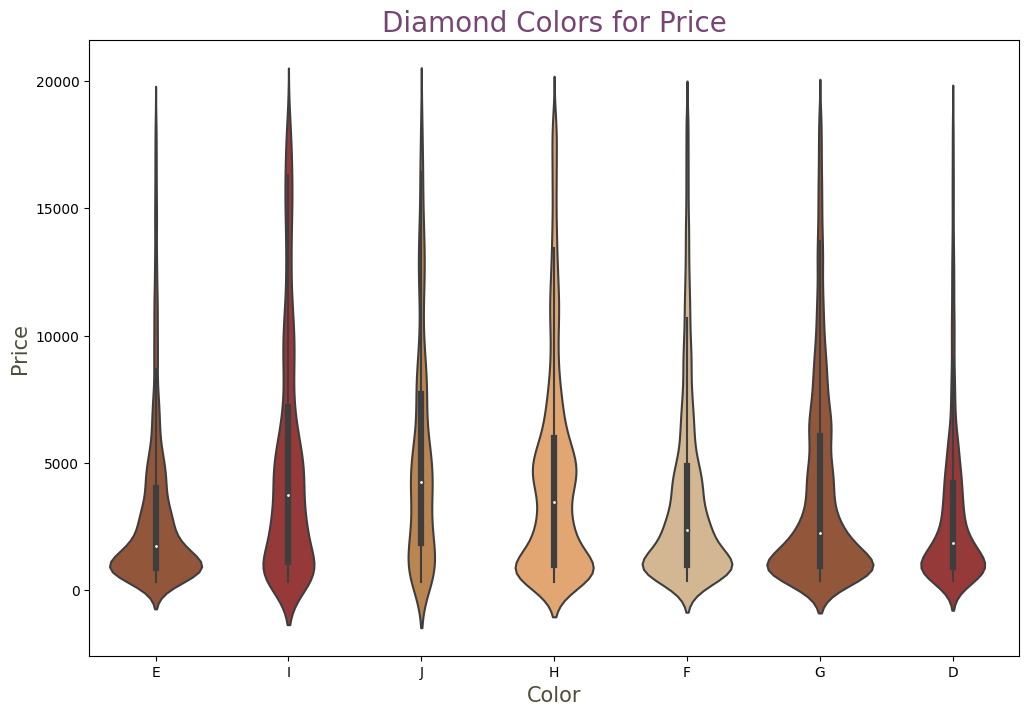

In [23]:
plt.figure(figsize=(12,8))
ax = sns.violinplot(x="color",y="price", data=df, palette=cols,scale= "count")
ax.set_title("Diamond Colors for Price", color="#774571", fontsize = 20)
ax.set_ylabel("Price", color="#4e4c39", fontsize = 15)
ax.set_xlabel("Color", color="#4e4c39", fontsize = 15)
plt.show()

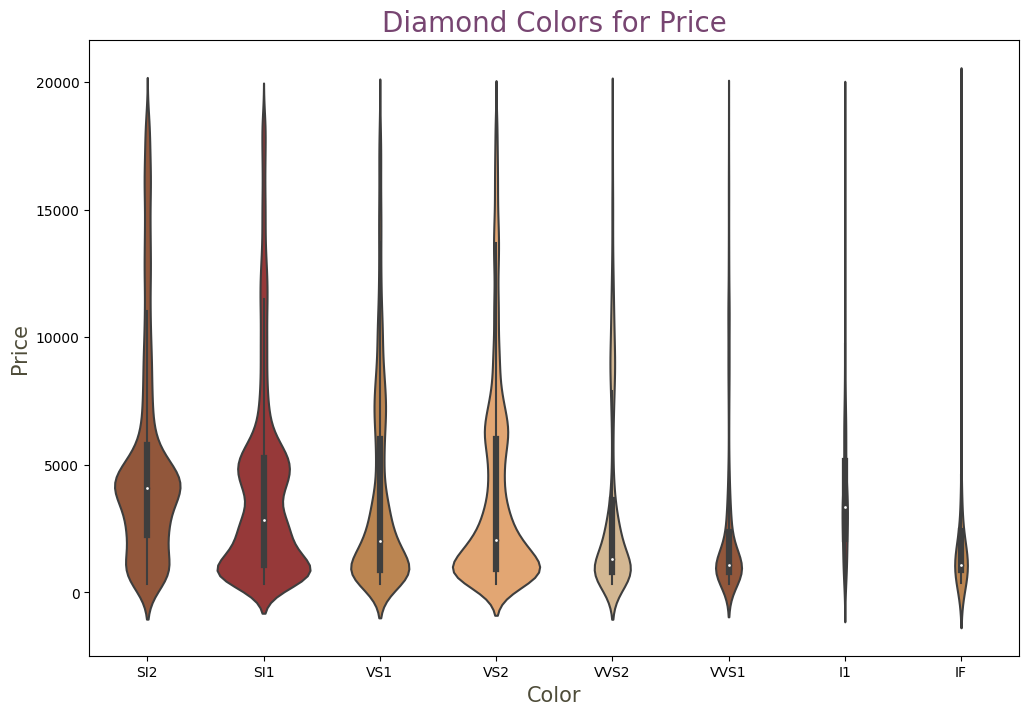

In [24]:
plt.figure(figsize=(12,8))
ax = sns.violinplot(x="clarity",y="price", data=df, palette=cols,scale= "count")
ax.set_title("Diamond Colors for Price", color="#774571", fontsize = 20)
ax.set_ylabel("Price", color="#4e4c39", fontsize = 15)
ax.set_xlabel("Color", color="#4e4c39", fontsize = 15)
plt.show()

(array([25335.,  9328.,  7393.,  3878.,  2364.,  1745.,  1306.,  1002.,
          863.,   726.]),
 array([  326. ,  2175.7,  4025.4,  5875.1,  7724.8,  9574.5, 11424.2,
        13273.9, 15123.6, 16973.3, 18823. ]),
 <BarContainer object of 10 artists>)

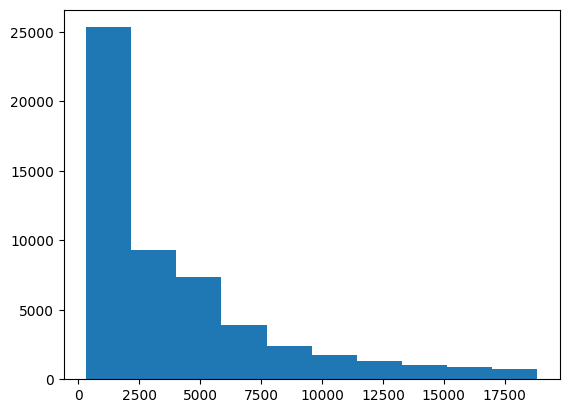

In [25]:
plt.hist(df["price"])

Checking for Potential Outliers

In [26]:
import plotly.express as px
fig = px.box(df, y="price")
fig.show()

In [27]:
import plotly.express as px
fig = px.box(df, x="x", y="price")
fig.show()

In [28]:
import plotly.express as px
fig = px.box(df, x="y", y="price")
fig.show()

In [31]:
import plotly.express as px
fig = px.histogram(df, x="depth", y="price")
fig.show()

In [43]:
# import plotly.express as px
fig = px.box(x=df['depth'])

fig.show()

### Find the outlier with quartile (Statistic Strategy)

In [36]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [37]:
outliers = find_outliers_IQR(df['price'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

outliers

number of outliers: 3540
max outlier value: 18823
min outlier value: 11886


23820    11886
23821    11886
23822    11888
23823    11888
23824    11888
         ...  
27745    18803
27746    18804
27747    18806
27748    18818
27749    18823
Name: price, Length: 3540, dtype: int64

In [40]:
outliers = find_outliers_IQR(df['depth'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

outliers

number of outliers: 2545
max outlier value: 79.0
min outlier value: 43.0


2        56.9
8        65.1
24       58.1
35       58.2
42       65.2
         ... 
53882    65.4
53886    58.0
53890    57.9
53895    57.8
53927    58.1
Name: depth, Length: 2545, dtype: float64

### DATA PREPROCESSING

In [38]:
#Data Cleaning

df = df.drop(["Unnamed: 0"], axis=1)
df.shape

(53940, 10)

In [39]:
df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [41]:
# Removing the datapoints having min 0 value in either x, y or z features 
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.shape

(53920, 10)

In [50]:
# Dropping the outliers (since we have huge dataset) by defining appropriate measures across features 
df = df[(df["depth"]<75)&(df["depth"]>45)]

df.shape 

(53914, 10)

In [55]:
df = df[(df["table"]<80)&(df["table"]>40)]
df = df[(df["x"]<40)]
df = df[(df["y"]<40)]
df = df[(df["z"]<40)&(df["z"]>2)]
df.shape

(53909, 10)

In [58]:
from sklearn.preprocessing import LabelEncoder
# Making a copy to keep original data in its form intact
df1 = df.copy()

# Applying label encoder to columns with categorical data
columns = ['cut','color','clarity']
label_encoder = LabelEncoder()
for col in columns:
    df1[col] = label_encoder.fit_transform(df1[col])
df1.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000
mean,0.797617,2.553396,2.593964,3.835575,61.749743,57.455852,3930.513680,5.731441,5.733764,3.539994
std,0.473759,1.027444,1.701283,1.724540,1.420093,2.226169,3987.145802,1.119369,1.116891,0.702085
min,0.200000,0.000000,0.000000,0.000000,50.800000,43.000000,326.000000,3.730000,3.680000,2.060000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,2400.000000,5.700000,5.710000,3.530000
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,5322.000000,6.540000,6.540000,4.040000
max,5.010000,4.000000,6.000000,7.000000,73.600000,79.000000,18823.000000,10.740000,31.800000,31.800000


Now, we may analyze correlation matrix after getting done with pre-processing for possible feature selection in order to make our dataset more cleaner, optimal before we feed it into algorithm

            carat       cut     color   clarity     depth     table     price  \
carat    1.000000  0.017344  0.291321 -0.214144  0.029266  0.181818  0.921590   
cut      0.017344  1.000000  0.000162  0.028092 -0.195836  0.152563  0.039971   
color    0.291321  0.000162  1.000000 -0.027713  0.049038  0.027022  0.172371   
clarity -0.214144  0.028092 -0.027713  1.000000 -0.053509 -0.088242 -0.071513   
depth    0.029266 -0.195836  0.049038 -0.053509  1.000000 -0.302211 -0.010288   
table    0.181818  0.152563  0.027022 -0.088242 -0.302211  1.000000  0.127125   
price    0.921590  0.039971  0.172371 -0.071513 -0.010288  0.127125  1.000000   
x        0.977777  0.022156  0.270616 -0.225907 -0.024401  0.196344  0.887213   
y        0.971646  0.027644  0.268637 -0.221786 -0.027388  0.188719  0.884103   
z        0.961711  0.001826  0.270260 -0.226407  0.096072  0.152331  0.868836   

                x         y         z  
carat    0.977777  0.971646  0.961711  
cut      0.022156  0.027644 

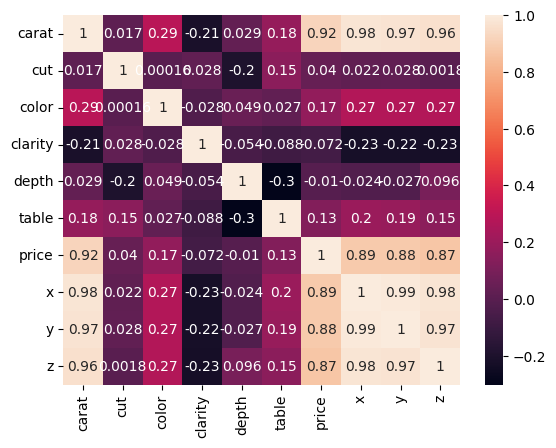

In [60]:
import seaborn as sn
corr_matrix = df1.corr()
print(corr_matrix)

sn.heatmap(corr_matrix, annot=True)
plt.show()

Features "carat", "x", "y", "z" are highly correlated to our target variable, price.¶
Features "cut", "clarity", "depth" are very low correlated (<|0.1|) thus may be removed though due to presence of only few selected features, we won't be doing that.

In [62]:
from sklearn.model_selection import train_test_split
# Defining the independent and dependent variables
X= df1.drop(["price"],axis =1)
y= df1["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=30)

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn. linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [64]:
# Building pipelins of standard scaler and model for varios regressors.

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr",LinearRegression())])

pipeline_lasso=Pipeline([("scalar2", StandardScaler()),
                      ("lasso",Lasso())])

pipeline_dt=Pipeline([("scalar3",StandardScaler()),
                     ("dt",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar4",StandardScaler()),
                     ("rf",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar5",StandardScaler()),
                     ("kn",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar6",StandardScaler()),
                     ("xgb",XGBRegressor())])

In [65]:
# List of all the pipelines
pipelines = [pipeline_lr, pipeline_lasso, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipeline_dict = {0: "LinearRegression", 1: "Lasso", 2: "DecisionTree", 3: "RandomForest",4: "KNeighbors", 5: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [66]:
#Performed cross validation 
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=12)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipeline_dict[i], -1 * cv_score.mean()))

LinearRegression: 1387.613385 


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.387e+09, tolerance: 6.261e+07

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.033e+09, tolerance: 6.257e+07



Lasso: 1364.561093 
DecisionTree: 742.276201 
RandomForest: 548.738078 
KNeighbors: 817.945423 
XGBRegressor: 550.391746 


In [67]:
# Model prediction on test data with XGBClassifier which gave us the least RMSE 
pred = pipeline_xgb.predict(X_test)
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

R^2: 0.9829123699287527
Adjusted R^2: 0.982898093223346


In [68]:
#Linear regression prediction score.
pred = pipeline_lr.predict(X_test)
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

R^2: 0.888284331837273
Adjusted R^2: 0.8881909934587486


In [69]:
# Define parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'subsample': [0.5, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.8, 1.0]
}

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [71]:
# Create XGBRegressor object
xgb = XGBRegressor()

# Create GridSearchCV object
grid = GridSearchCV(xgb, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid.fit(X_train, y_train)

# Print best hyperparameters
print("Best hyperparameters:", grid.best_params_)

# Predict on test set using best model
y_pred = grid.predict(X_test)

# Calculate RMSE on test set
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

Best hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
RMSE: 508.7189518535546


In [74]:
pred = grid.predict(X_test)
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

R^2: 0.9841466142921238
Adjusted R^2: 0.9841333687971952


After performing multiple models and cross-validation techniques, we have observed that the performance of the models is nearly identical. Therefore, we can conclude that using grid search cross-validation may not be the best approach in this case, as it can be computationally expensive and time-consuming. In other words, the cost of using grid search cross-validation may outweigh the benefits, since the improvement in model performance is negligible.